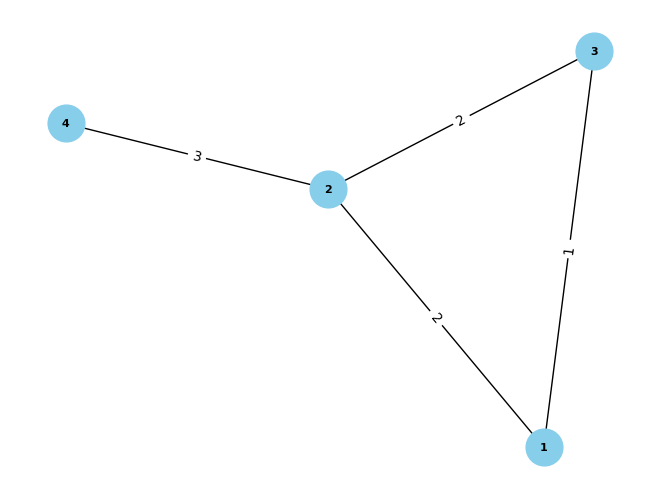

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

# Create a graph with 10 nodes
G = nx.Graph()

# Add nodes to the graph
nodes = 4

G.add_nodes_from(range(1, nodes))
G.add_edge(1, 2, weight=2)
G.add_edge(1, 3, weight=1)
G.add_edge(3, 2, weight=2)
G.add_edge(2, 4, weight=3)

# Plot the graph with weights
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

# Add edge labels with weights
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

## 1. Weight matrix

In [3]:
weight_array = nx.adjacency_matrix(G, weight='weight').todense()
print(weight_array)

[[0 2 1 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]


In [4]:
start_node = 3
shortest_paths = nx.shortest_path_length(G, source=start_node, weight='weight')
print(f"Shortest distances from node {start_node}: {shortest_paths}")

Shortest distances from node 3: {3: 0, 1: 1, 2: 2, 4: 5}


In [5]:
np.random.seed(41)
nod_numbers = len(G.nodes())

probabilities = np.round(np.random.rand(nod_numbers, nod_numbers), decimals=2)
prob_array = np.where(weight_array > 0, probabilities, 0)
print(prob_array)

[[0.   0.05 0.68 0.  ]
 [0.12 0.   0.19 0.67]
 [0.92 0.42 0.   0.  ]
 [0.   0.32 0.   0.  ]]


In [6]:
def infection_matrix(net):
    
    num_nodes = len(net.nodes())
    infection_array = np.zeros((num_nodes, num_nodes), dtype=float)

                
    return infection_array

infect_array = infection_matrix(G)
print(infect_array)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [7]:
node_idx = (np.array(list(shortest_paths.keys())) - 1)[-3:]
node_idx

array([0, 1, 3])

In [8]:
def update_time(times_matrix, seed_node):
    
    values = 0
    track = np.array([seed_node - 1])
    
    for _ in range(times_matrix.shape[0]):
        try:
            # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
            min_value = np.min(times_matrix[(seed_node - 1), times_matrix[(seed_node - 1), :] > values])
            print("min_values", min_value)
            values = min_value

            # Index
            # find the array of indeces in the array with minimum values Nodes
            Nodes = np.where(times_matrix[(seed_node - 1), :] == min_value)[0]

            ##########################
            #Update the infection time
            ##########################
            update = times_matrix[Nodes, :] 
            update[update > 0] += min_value
            #add the update
            times_matrix[Nodes, :] = update
            
            track = np.append(track, [Nodes])
         
        except:
            break
            
    return times_matrix, track    

In [9]:
def update_time2(times_matrix, seed_node):
    
    values = 0
    track = np.array([seed_node - 1])
      
    
    # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
    min_value = np.min(times_matrix[(seed_node - 1), times_matrix[(seed_node - 1), :] > values])
    print("min_values", min_value)
    values = min_value

    # Index
    # find the array of indeces in the array with minimum values Nodes
    Nodes = np.where(times_matrix[(seed_node - 1), :] == min_value)[0]

    ##########################
    #Update the infection time
    ##########################
    update = times_matrix[Nodes, :]    
    update[update > 0] += min_value
    #add the update
    times_matrix[Nodes, :] = update

    track = np.append(track, [Nodes])

    

    for k in track[1:]:

        # What was the min value of the arrange greater than 0 (it-self)--> faster transmittion
        min_value = np.min(times_matrix[(k), times_matrix[(k), :] > values])
        print("min_values", min_value)
        values = min_value

        # Index
        # find the array of indeces in the array with minimum values Nodes
        Nodes = np.where(times_matrix[(k), :] == min_value)[0]

        ##########################
        #Update the infection time
        ##########################
        update = times_matrix[Nodes, :] 
        update[update > 0] += min_value
        #add the update
        times_matrix[Nodes, :] = update


        # Check if any new number is not in the existing array
        new_nodes = np.setdiff1d(Nodes, track)

        # Append the new numbers to the existing array
        track = np.append(track, new_nodes)               

    return times_matrix, track  

In [14]:
seed_node = 3
times_matrix = nx.adjacency_matrix(G, weight='weight').todense()
print("Original times_matrix:")
print(times_matrix)

values = 0
track = np.array([seed_node - 1])
print("Initial TRACK:", track)

# What was the min value of the arrange greater than 0 (it-self)--> faster transmission
indeces = np.where(times_matrix[(seed_node - 1), :] >= 1)
values = times_matrix[(seed_node - 1), indeces]

# Check if any new number is not in the existing array
new_numbers = np.setdiff1d(indeces[0], track)
track = np.concatenate((track, new_numbers))

print("GO INSIDE")
# Update the infection time
for v, k in zip(values[0], track[1:]):
    print(v)
    
    print("row", k, "v", v)
    print("Before update:")
    print(times_matrix)

    update = times_matrix[k, :]
    update[update > 0] += v

    # Add the update
    times_matrix[k, :] = update

    # Update indeces and values for the next iteration
    indeces = np.where(times_matrix[k, :] >= 1)
    values = times_matrix[k, indeces]

    # Check if any new number is not in the existing array THE NODE == INDEX
    new_numbers = np.setdiff1d(indeces[0], track)
    print("new_numbers ROW", new_numbers)
    
    if new_numbers.size > 0:
        print("value ", times_matrix[k, new_numbers])  # aca el Value
        v = times_matrix[k, new_numbers]

        update = times_matrix[new_numbers, :]
        update[update > 0] += v
        # Add the update
        times_matrix[new_numbers, :] = update
    
        # Concatenate values and times_matrix[k, new_numbers]
        track = np.concatenate((track, new_numbers))

    print("After update:")
    print(times_matrix)
    print("New track:", track)

# Check if any new element was added to track in the last iteration
# Print the final times_matrix
print("Final times_matrix:")
print(times_matrix)

Original times_matrix:
[[0 2 1 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]
Initial TRACK: [2]
GO INSIDE
1
row 0 v 1
Before update:
[[0 2 1 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]
new_numbers ROW []
After update:
[[0 3 2 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]
New track: [2 0 1]
2
row 1 v 2
Before update:
[[0 3 2 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]
new_numbers ROW [3]
value  [5]
After update:
[[0 3 2 0]
 [4 0 4 5]
 [1 2 0 0]
 [0 8 0 0]]
New track: [2 0 1 3]
Final times_matrix:
[[0 3 2 0]
 [4 0 4 5]
 [1 2 0 0]
 [0 8 0 0]]


In [52]:
weight_array = nx.adjacency_matrix(G, weight='weight').todense()
print(weight_array)

[[0 2 1 0]
 [2 0 2 3]
 [1 2 0 0]
 [0 3 0 0]]


In [87]:
time_array2, track = update_time(weight_array, seed_node = 3)

min_values 1
min_values 2


In [88]:
time_array2

array([[0, 3, 2, 0],
       [4, 0, 4, 5],
       [1, 2, 0, 0],
       [0, 3, 0, 0]])

In [90]:
time_array3, track = update_time2(weight_array, seed_node = 3)

min_values 1
min_values 3


In [91]:
time_array3

array([[0, 4, 3, 0],
       [4, 0, 4, 5],
       [4, 5, 0, 0],
       [0, 3, 0, 0]])

In [14]:
prob_array

array([[0.  , 0.05, 0.68, 0.  ],
       [0.12, 0.  , 0.19, 0.67],
       [0.92, 0.42, 0.  , 0.  ],
       [0.  , 0.32, 0.  , 0.  ]])

In [16]:
track # NODES

array([2, 0, 1])

In [36]:


def infection(p, track, prob_array, infect_array):

    p = 0.23
    #print("nod", track[0])
    infection_row = np.where(prob_array[track[0], :] >= p, 1, 0)
    infect_array[track[0],:] = infection_row

    #print(prob_array[track[0], :])
    #print(infect_array[track[0], :])
    #print("GO inside")


    for i in infection_row[1:]: # 1, 0, 0, 0
        print("i", i)

        if i == 1:
            for j in track[1:]: # ..., 1, 1
                print("j ", j)
                infect_row = np.where(prob_array[j, :] >= p, 1, 0)
                infect_array[j,:] = infect_row

                cols = np.where(infect_array[j,:] == 1)
                print("columns", cols)

                # Check if any new number is not in the existing array
                new_numbers = np.setdiff1d(cols, track)

                # Append the new numbers to the existing array
                track = np.append(track, new_numbers)

                print("infected row", infect_row)
                print(prob_array[j, :])
                print("done")
        else:
            print("i =", i, "pass")
            pass

    return infect_array
     

nod 2
[0.92 0.42 0.   0.  ]
[1. 1. 0. 0.]
GO inside
i 1
j  0
columns (array([2]),)
infected row [0 0 1 0]
[0.   0.05 0.68 0.  ]
done
j  1
columns (array([3]),)
infected row [0 0 0 1]
[0.12 0.   0.19 0.67]
done
j  3
columns (array([1]),)
infected row [0 1 0 0]
[0.   0.32 0.   0.  ]
done
i 0
i = 0 pass
i 0
i = 0 pass


In [37]:
track[1:]

array([0, 1, 3])

In [38]:
prob_array

array([[0.  , 0.05, 0.68, 0.  ],
       [0.12, 0.  , 0.19, 0.67],
       [0.92, 0.42, 0.  , 0.  ],
       [0.  , 0.32, 0.  , 0.  ]])

In [39]:
infect_array



array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [22]:
# Create a sample numpy array
arr = np.array([[0, 1, 0],
                [1, 0, 1],
                [0, 1, 1]])

# Get the indices of elements equal to 1
row_indices, col_indices = np.where(arr == 1)

# Print the column indices
print("Column indices of values equal to 1:", col_indices)

Column indices of values equal to 1: [1 0 2 1 2]


In [24]:
row_indices, col_indices = np.where(infect_array == 1)

# Print the row and column indices
print("Row indices of values equal to 1:", row_indices)
print("Column indices of values equal to 1:", col_indices)

# Alternatively, print the (row, column) pairs
indices_pairs = list(zip(row_indices, col_indices))
print("(Row, Column) indices pairs of values equal to 1:", indices_pairs)

Row indices of values equal to 1: [0 0 1 1 1 2 2]
Column indices of values equal to 1: [1 2 0 2 3 0 1]
(Row, Column) indices pairs of values equal to 1: [(0, 1), (0, 2), (1, 0), (1, 2), (1, 3), (2, 0), (2, 1)]


In [26]:
# Your existing numpy array
existing_array = np.array([1, 2, 3])

# New numbers to check
new_numbers = np.array([9])

# Check if any new number is not in the existing array
existing_array = np.append(existing_array, new_numbers[~np.isin(new_numbers, existing_array)])

# Print the updated array
print("Updated array:", existing_array)


Updated array: [1 2 3 9]
